Visulizing and Understanding the Datsaset   _---------------**

 Importing all Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats


# 1.1 Downloaded The dataset from the provided link and uploaded it to Google Colab.

Dataset Link used :  https://archive.ics.uci.edu/dataset/514/bias+correction+of+numerical+prediction+model+temperature+**forecast**

In [ ]:
# 1.2 Convert the dataset into a DataFrame using appropriate code.

df = pd.read_csv('/content/Bias_correction_ucl.csv')

 Display the first and last five records (1.3)


In [ ]:
# 1.3 Display the first and last five records
print("First five records:")
display(df.head())

print("Last five records:")
display(df.tail())


(1.4) Display column headings, statistical information, description, summary



In [ ]:


# 1.4 Use functions to display:
#    o Column headings
#    o Statistical information (like df.info())
#    o Description of the data (df.describe())
#    o Statistical summary is essentially the same as df.describe()

print("Column headings:")
print(df.columns)

print("\nStatistical information (data types, non-null counts):")
print(df.info())

print("\nDescription of the data (statistical summary):")
display(df.describe())


 Observations (1.5)

In [ ]:
# 1.5 Write  observations:
#    o Number of features and examples in the dataset.
#    o Types of data attributes.

print("Number of examples (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])

# Types of data attributes:
# Check the data types of each column.
print("\nData types of each column:")
print(df.dtypes)

Part 2: Data Preparation
Cell 7: Check for duplicates, missing data, inconsistencies, and outliers (2.1)


# 2.1 Check for:

In [ ]:

#    o Duplicate data
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

#    o Missing data
missing_data = df.isnull().sum()
print("\nMissing values per column:\n", missing_data)

#    o Data inconsistencies
# This will depend on domain knowledge. For demonstration, let's assume 'station' should be between 1 and 25.
inconsistent_stations = df[~df['station'].between(1, 25)]
if not inconsistent_stations.empty:
    print("\nFound inconsistent station values:\n", inconsistent_stations)
else:
    print("\nNo inconsistencies found in 'station' column.")

# For date,  check all dates are in chronological order or valid:
# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
if df['Date'].isnull().any():
    print("Some dates could not be converted to datetime, indicating inconsistency.")
else:
    print("No inconsistencies found in 'Date' column.")

#    o Outliers (using boxplots for some numeric columns)
numeric_cols = df.select_dtypes(include=np.number).columns
# plot a few boxplots for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# 2.2 Apply techniques to:


In [ ]:

#    o Remove duplicate data
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("\nDuplicates removed. New shape:", df.shape)
else:
    print("\nNo duplicates to remove.")

#    o Impute or remove missing data
# Check the proportion of missing data for each column:
missing_ratios = df.isnull().mean()
print("\nMissing ratios per column:\n", missing_ratios)

# Decide how to handle missing values. For demonstration:
# If minimal missing data, we might drop rows:
df = df.dropna()
print("\nAfter dropping rows with missing values, new shape:", df.shape)


In [ ]:
#    o Resolve data inconsistencies  & #    o Remove outliers

# Outlier removal is domain-specific. For demonstration, let's define an outlier removal based on z-score.
from scipy import stats

for col in numeric_cols:
    # Compute z-scores
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    # Define a threshold, for example 3 standard deviations
    threshold = 3
    outlier_count = (z_scores > threshold).sum()
    if outlier_count > 0:
        print(f"Found {outlier_count} potential outliers in {col}, removing them.")
        # Keep rows that are within the threshold
        df = df[(np.abs(stats.zscore(df[col])) <= threshold)]
    else:
        print(f"No significant outliers found in {col}.")

print("Shape after outlier removal:", df.shape)


Encode categorical data (2.3)



In [ ]:

encoder = LabelEncoder()
df['station'] = encoder.fit_transform(df['station'])

# NOTE: If there were other categorical features (like 'Date'), we might choose to extract features like year, month, day
# instead of encoding the entire date as a category. Since 'Date' is temporal, we often process it differently.
# For demonstration, let's just keep the 'Date' as is or extract year, month, day as separate features:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# After extracting these, you could drop the original 'Date' column if it's no longer needed
df = df.drop(columns='Date')

In [ ]:
# 2.4 Report your observations:

# Observations (example):
# - Duplicates: If duplicates were found and removed, note how many.
# - Missing Data: Mention how much was found, how it was handled (e.g. dropped rows).
# - Data Inconsistencies: If none were found, explicitly state none were found.
# - Outliers: If any outliers were identified and removed, note the approach and how many were removed.
# - Encoding: Justify why Label Encoding was chosen for 'station' (simple categorical variable with no intrinsic order needed to be encoded).

print("\nObservations:")
print("- Duplicates: ", "Removed" if num_duplicates > 0 else "No duplicates found.")
print("- Missing Data: Handled by dropping rows with missing values.")
print("- Inconsistencies: None detected in 'station' or 'Date' after conversion.")
print("- Outliers: Potential outliers removed using z-score > 3 threshold.")
print("- Encoding: Used Label Encoding for 'station' as it is a categorical variable with discrete station IDs.")

Part 3: Data Exploration using Visualizations


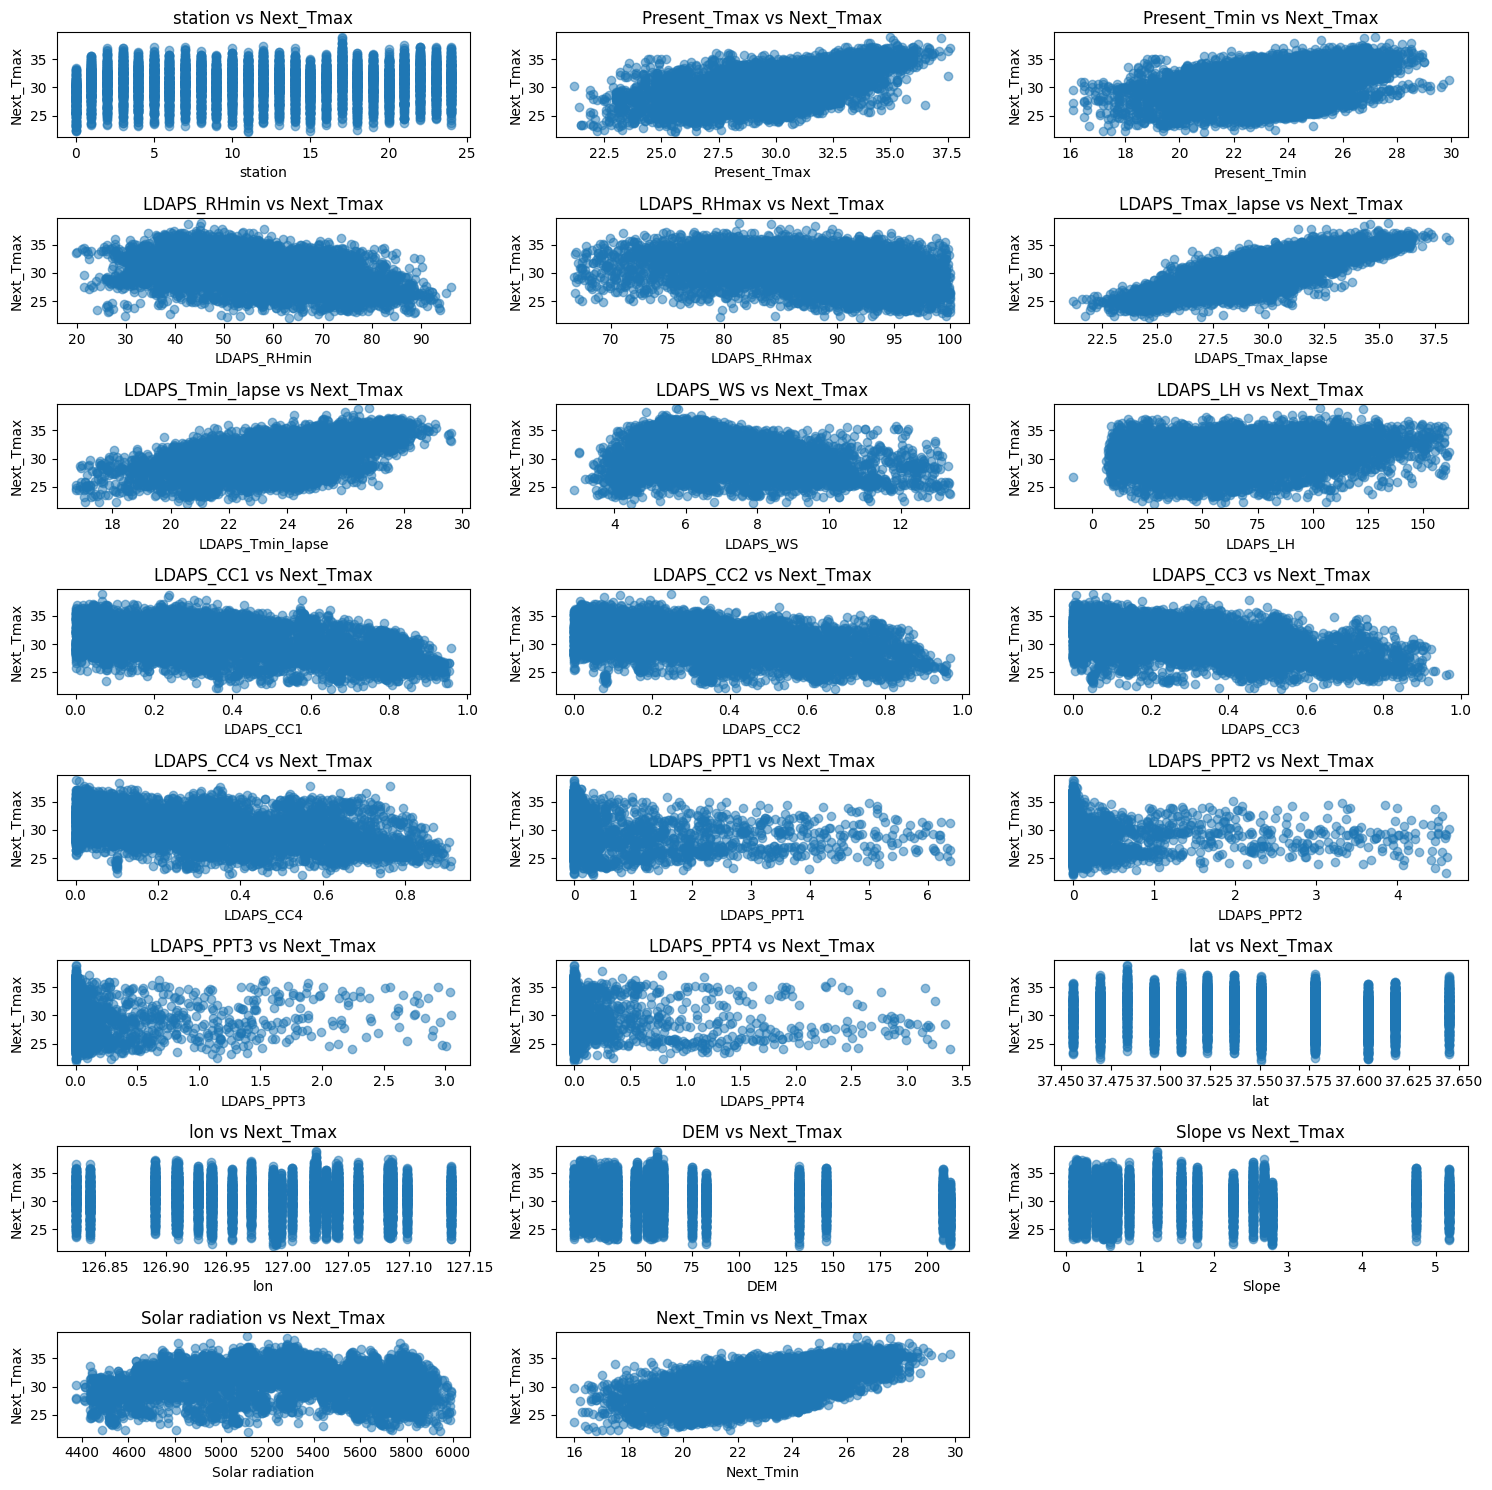

In [ ]:


# Assume 'df' is your cleaned DataFrame and 'Next_Tmax' is the target variable.
target_variable = 'Next_Tmax'

# 3.1 Create scatter plots for each feature against the target variable.
# Identify numeric features (excluding the target itself):
numeric_features = df.select_dtypes(include=['int64','float64']).columns.drop(target_variable, errors='ignore')

plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features)//3 + 1, 3, i+1)
    plt.scatter(df[col], df[target_variable], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.title(f"{col} vs {target_variable}")
plt.tight_layout()
plt.show()


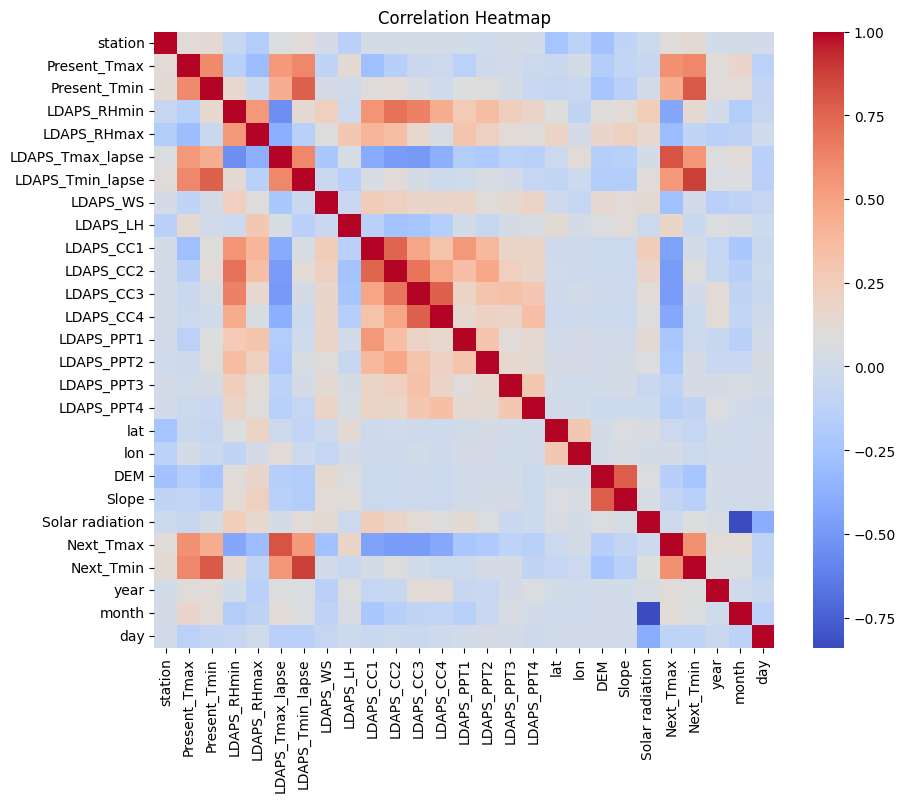

In [ ]:

# 3.2 Perform EDA using two additional visualizations
#    For example:
#    - A heatmap of correlation between features
#    - A pair plot focusing on a subset of features and the target

# Correlation Heatmap:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




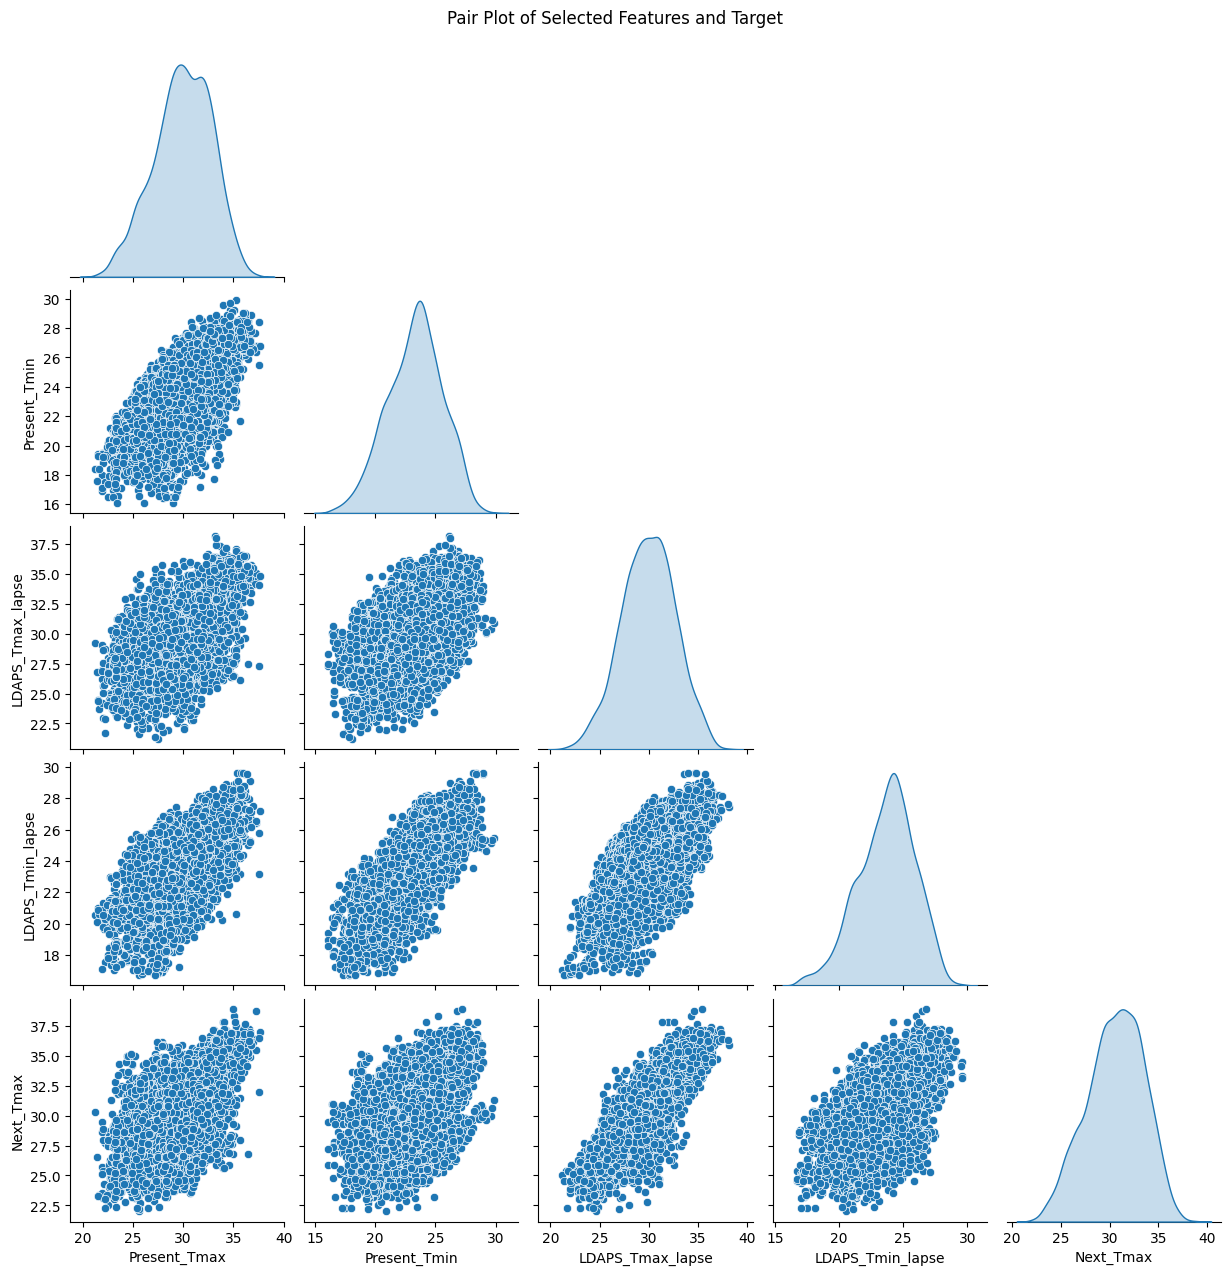

In [ ]:
# Pair Plot (we will choose a subset of features, including target):
# Selecting a few features that might have strong relationships with the target based on domain knowledge or the correlation matrix.
features_for_pairplot = ['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', target_variable]
sns.pairplot(df[features_for_pairplot], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Selected Features and Target', y=1.02)
plt.show()